In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [24]:
db_name = '/home/daryl/processing/UPS2_200ng/UPS2_200ng-features-1-368.sqlite'
feature_id = 100
db_conn = sqlite3.connect(db_name)
ms1_feature_region_peaks_df = pd.read_sql_query("select * from ms1_feature_region_peaks where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [25]:
ms1_feature_region_peaks_df

,feature_id,peak_id,centroid_mz,centroid_scan,intensity_sum,scan_upper,scan_lower,std_dev_mz,std_dev_scan,rationale,intensity_max,peak_max_mz,peak_max_scan
0,100,1,688.650576,96.468328,54510360,106,90,0.000653,2.135125,"{""highest intensity point id"": 43}",8662441,688.650744,96
1,100,2,688.316370,96.443320,49429193,106,87,0.000771,2.093372,"{""highest intensity point id"": 44}",8038209,688.316984,96
2,100,3,688.984228,96.431726,33101901,106,89,0.000614,2.069279,"{""highest intensity point id"": 45}",5513357,688.984874,96
3,100,4,689.318326,96.502805,14047405,106,90,0.000502,2.105160,"{""highest intensity point id"": 46}",2244810,689.318888,96
4,100,5,689.652410,96.420768,4783273,106,90,0.000791,2.124094,"{""highest intensity point id"": 47}",743795,689.652263,96
5,100,6,689.986473,96.317096,1412035,103,92,0.000740,1.799487,"{""highest intensity point id"": 48}",232720,689.986909,96
6,100,7,690.322185,95.778287,59383,100,92,0.001663,1.644514,"{""highest intensity point id"": 42}",12398,690.322610,95


In [26]:
db_conn = sqlite3.connect(db_name)
ms1_peak_points_df = pd.read_sql_query("select peak_id,point_id,mz,scan,intensity from summed_ms1_regions where feature_id={} order by peak_id,scan ASC;".format(feature_id), db_conn)
db_conn.close()

In [27]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

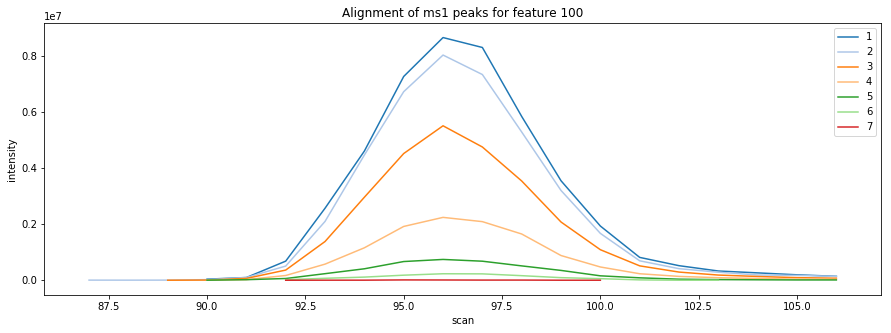

In [28]:
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
groups = ms1_peak_points_df.groupby('peak_id')
for i, (name, group) in enumerate(groups):
    ax1.plot(group.scan, group.intensity, color=tableau20[i%len(tableau20)], label=name)
plt.legend(loc='best')
ax1.set_ylabel('intensity')
ax1.set_xlabel('scan')
plt.title('Alignment of ms1 peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()